<a href="https://colab.research.google.com/github/rahiakela/mlops-research-and-practice/blob/main/machine-learning-for-streaming-data/01_online_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [ ]:
!pip install river

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from river import linear_model
from river import linear_model, metrics, multiclass

import matplotlib.pyplot as plt

##Dataset

In [2]:
colnames = ['sepal_length','sepal_width','petal_length','petal_width','class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=colnames)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# you will need to convert the class column into a binary column for binary classifier
data["setosa"] = data["class"] == "Iris-setosa"
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,True
1,4.9,3.0,1.4,0.2,Iris-setosa,True
2,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4.6,3.1,1.5,0.2,Iris-setosa,True
4,5.0,3.6,1.4,0.2,Iris-setosa,True


In [7]:
# let's write code to loop through the data to simulate a streaming data input
for i, row in data.sample(1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
  X = X.to_dict()

  y = row["setosa"]

  print(X)
  print(y)
  break

{'sepal_length': 6.5, 'sepal_width': 3.0, 'petal_length': 5.5, 'petal_width': 1.8}
False


##Binary classifier

In [8]:
# Now, let's fit the model one by one by random order
model = linear_model.LogisticRegression()

for i, row in data.sample(frac=1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

  X = X.to_dict()
  y = row["setosa"]

  model.learn_one(X, y)

In [9]:
# Let's see how the predictions can be made on the training data
pred = model.predict_many(data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
print(pred)

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [10]:
# let's use the accuracy score to estimate the training accuracy
accuracy_score(data["setosa"], pred)

1.0

Although the model has learned perfect prediction on the data
that it has seen during the learning process, it is unlikely that the performance would
be as good on new, unseen data points.

##Model evaluation

In [11]:
# add a stratified train test split
train_data, test_data = train_test_split(data, stratify=data["setosa"])

In [12]:
model = linear_model.LogisticRegression()
correct = []

for i, row in train_data.sample(frac=1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

  X = X.to_dict()
  y = row["setosa"]

  model.predict_one(X)
  correct.append(y == model.predict_one(X))
  model.learn_one(X, y)

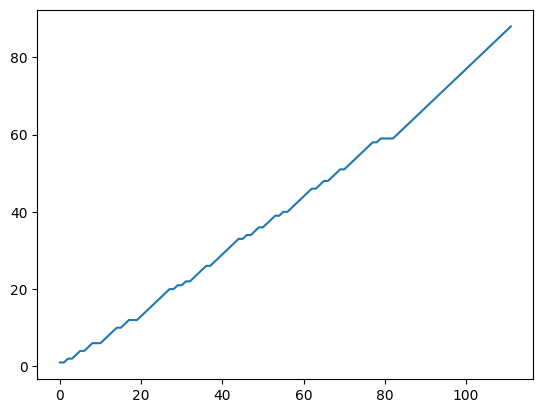

In [13]:
# Let's plot the cumulative sum of correct scores over time
plt.plot(np.cumsum(correct))

In [14]:
# Finally, let's compute the accuracy on the test score
pred = model.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
accuracy_score(test_data["setosa"], pred)

1.0

##Multiclass classifier

In [3]:
# add a stratified train test split
train_data, test_data = train_test_split(data, stratify=data["class"])

In [5]:
model2 = multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
correct = []

for i, row in train_data.sample(frac=1).iterrows():
  X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

  X = X.to_dict()
  y = row["class"]

  model2.predict_one(X)
  correct.append(y == model2.predict_one(X))
  model2.learn_one(X, y)

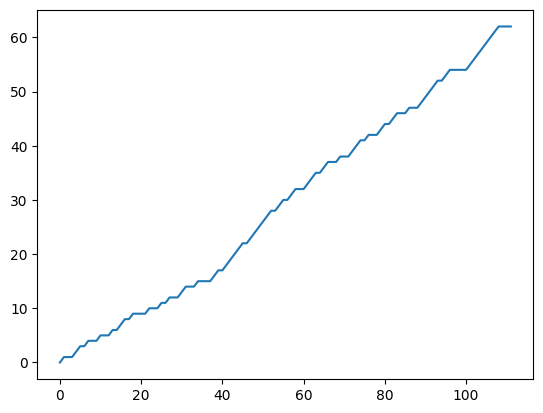

In [6]:
plt.plot(np.cumsum(correct))

In [7]:
model2.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

18         Iris-setosa
149    Iris-versicolor
55     Iris-versicolor
8          Iris-setosa
4          Iris-setosa
125    Iris-versicolor
50     Iris-versicolor
107    Iris-versicolor
12         Iris-setosa
81     Iris-versicolor
67     Iris-versicolor
76     Iris-versicolor
44         Iris-setosa
3          Iris-setosa
13         Iris-setosa
7          Iris-setosa
63     Iris-versicolor
143    Iris-versicolor
109    Iris-versicolor
75     Iris-versicolor
79     Iris-versicolor
127    Iris-versicolor
128    Iris-versicolor
146    Iris-versicolor
51     Iris-versicolor
117    Iris-versicolor
122    Iris-versicolor
2          Iris-setosa
97     Iris-versicolor
136    Iris-versicolor
58     Iris-versicolor
29         Iris-setosa
93     Iris-versicolor
49         Iris-setosa
145    Iris-versicolor
0          Iris-setosa
54     Iris-versicolor
40         Iris-setosa
dtype: object

In [8]:
pred = model2.predict_many(test_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
accuracy_score(test_data["class"], pred)

0.6842105263157895